In [0]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

#Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [ ]:
train_origin = pd.read_csv("./data/input/train.csv")
test_origin = pd.read_csv("./data/input/test.csv")
train_df = train_origin
test_df = test_origin
train_ID = train_origin["Id"]
test_ID = test_origin["Id"]
all_data = pd.concat((train_origin, test_origin)).reset_index(drop=True)

In [0]:
# get index key
ntrain = train_origin.shape[0]
ntest = test_origin.shape[0]

In [0]:
pd.set_option('display.max_columns', 81)
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [0]:
print(train_df.shape)
print(test_df.shape)
print(all_data.shape)

(1460, 81)
(1459, 80)
(2919, 81)


In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
Missing_data = pd.DataFrame({"Missing Ration" : all_data_na})
Missing_data.head(50)

,Missing Ration
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071


Text(0.5,1,'missing data ratio')

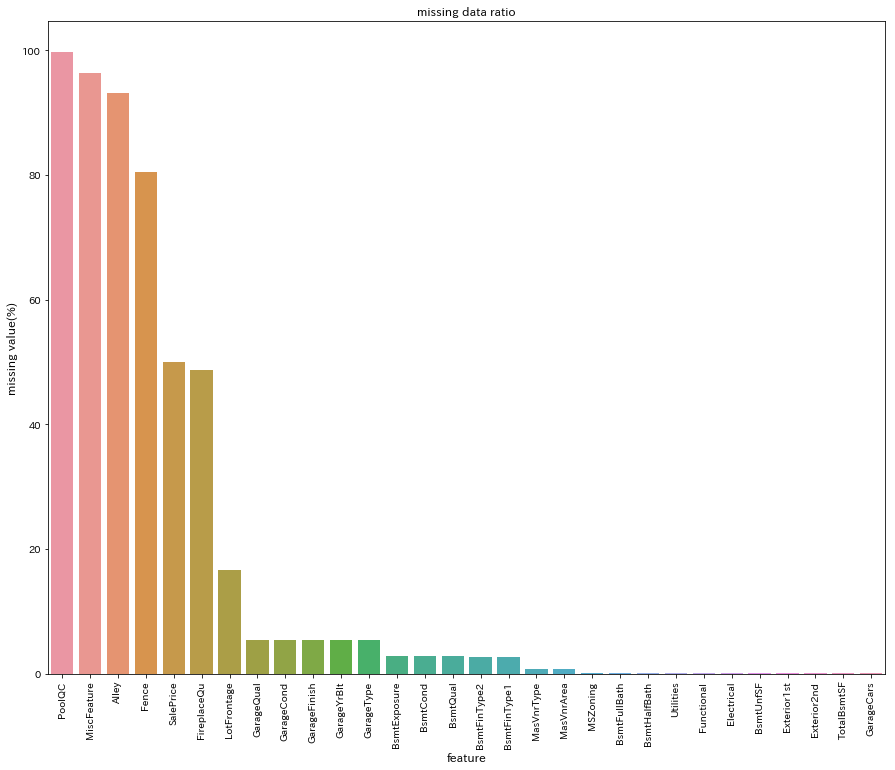

In [0]:
# plot size
f, ax = plt.subplots(figsize=(15,12))
# x label angle
plt.xticks(rotation="90")
# function x,y
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel("feature",fontsize=12)
plt.ylabel("missing value(%)",fontsize=12)
plt.title("missing data ratio")

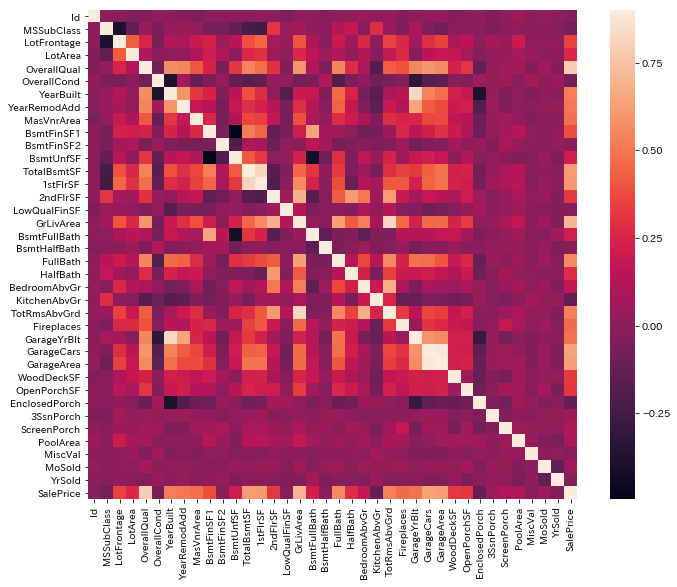

In [0]:
# heatmap

# correlation coefficient
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

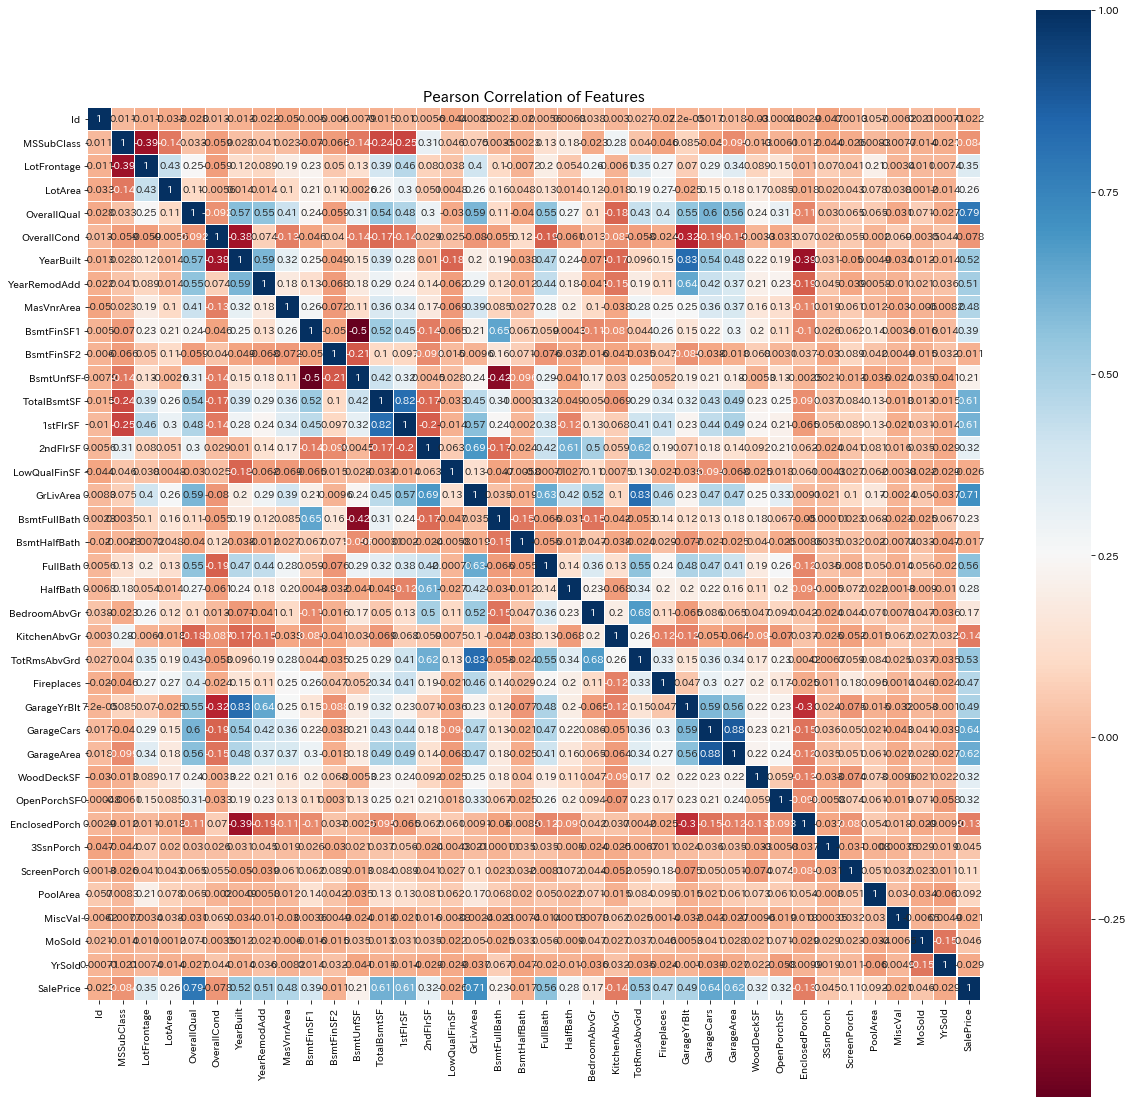

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Imputing missing values

MSZoning is object type and most common value mode() = 'RL' 

In [0]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

LotFrontage:Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood

In [0]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Alley: Na mean "no allet access"

In [0]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Utilities: won't help in predictive modeling

In [0]:
all_data = all_data.drop(["Utilities"],axis=1)

Exterior1st and Exterior2nd : only one missing, complete most common string

In [0]:
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])
all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0])

MasVnrType: NA likely mean no masonry veneer for those house, stiring, area=int

In [0]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
Missing_data = pd.DataFrame({"Missing Ration" : all_data_na})
Missing_data.head(50)

,Missing Ration
PoolQC,99.657417
MiscFeature,96.402878
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageType,5.378554


GarageType, GarageFinish, GarageQual and GarageCond

In [0]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna("None")

GarageYrBlt, GarageArea and GarageCars

In [0]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath

In [0]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 

In [0]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna("None")

PoolQC: NA mean "No pool"

In [0]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

MiscFeature : data description says NA means "no misc feature"

In [0]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Fence : NA means "no fence"

In [0]:
all_data["Fence"] = all_data["Fence"].fillna("None")

Functional: typical

In [0]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical:Only one missing value, set for the missing value in KitchenQual

In [0]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

SaleType 

In [0]:
all_data["SaleType"] = all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])

FireplaceQu : NA means "no fireplace"

In [0]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

Electrical

In [0]:
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])

MSSubClass 

In [0]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Add nwe feature

In [0]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [0]:
print(all_data.shape)

(2919, 81)


In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 81)


In [0]:
# get int floot column name
all_data.dtypes[all_data.dtypes == "object"].index

Index(['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle',
       'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType'],
      dtype='object')

In [0]:
all_data.dtypes[all_data.dtypes == "object"].index

Index(['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle',
       'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType'],
      dtype='object')

In [0]:
# LavelEncording
from sklearn.preprocessing import LabelEncoder
mapper = {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0}
cols = ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'HeatingQC', 'FireplaceQu','GarageQual', 'GarageCond', 'PoolQC', 'KitchenQual')
for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))
    #1
    
mapper = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
all_data["BsmtExposure"].map(mapper)

    
mapper = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1 }
cols = ('BsmtFinType1', 'BsmtFinType2')  
for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))
    #3

mapper = {"Typ": 8, "Min1": 7, "Min2": 6, "Mod": 5, "Maj1": 4, "Maj2": 3, "Sev": 2, "Sal": 1}
all_data["Functional"].map(mapper)

mapper = {"Fin": 3, "RFn": 2, "Unf": 1}
all_data["GarageFinish"].map(mapper)
    
mapper = {"Y": 3, "P": 2, "N": 1}
all_data["PavedDrive"].map(mapper)

mapper = {"GdPrv": 4, "MnPrv" : 3, "GdWo": 2, "MnWw": 1}
all_data["Fence"].map(mapper)

mapper = {"Reg":4,"IR1":3,"IR2":2,"IR3":1}
all_data["LotShape"].map(mapper)
    

mapper = {"Gt1":3,"Mod":2,"Sev":1}
all_data["LandSlope"].map(mapper)
    
    
mapper = {"Grvl":2,"Pave":1}
all_data["Alley"].map(mapper)
    


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
2889   NaN
2890   NaN
2891   NaN
2892   NaN
2893   NaN
2894   NaN
2895   NaN
2896   NaN
2897   NaN
2898   NaN
2899   NaN
2900   NaN
2901   NaN
2902   NaN
2903   NaN
2904   NaN
2905   NaN
2906   NaN
2907   NaN
2908   NaN
2909   NaN
2910   NaN
2911   NaN
2912   NaN
2913   NaN
2914   NaN
2915   NaN
2916   NaN
2917   NaN
2918   NaN
Name: Alley, Length: 2919, dtype: float64

In [0]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
SalePrice,49.982871


In [0]:
all_data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley               0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2        0
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual            0
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence               0
FireplaceQu         0
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            0
MasVnrArea          0
MasVnrType          0
MiscFeature         0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

In [0]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2919, 223)

In [0]:
all_data.head(50)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,...,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,854,0,1,3,4,3,706.0,0.0,2,6,1.0,0.0,2,150.0,1,0,4,2,4,3,0,2,6,548.0,2.0,5,2,5,2003.0,1710,1,0,1,1,2,0,8450,65.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1262,0,0,1,3,4,1,978.0,0.0,0,6,0.0,1.0,2,284.0,1,0,4,3,4,5,1,2,6,460.0,2.0,5,2,5,1976.0,1262,0,0,2,1,3,0,9600,80.0,3,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,920,866,0,1,3,4,2,486.0,0.0,2,6,1.0,0.0,2,434.0,1,0,4,2,4,5,1,2,6,608.0,2.0,5,2,5,2001.0,1786,1,0,3,1,2,0,11250,68.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,961,756,0,1,3,1,3,216.0,0.0,0,6,1.0,0.0,4,540.0,1,272,4,3,4,2,1,1,6,642.0,3.0,5,3,5,1998.0,1717,0,2,4,1,2,0,9550,60.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1145,1053,0,1,4,4,0,655.0,0.0,2,6,1.0,0.0,2,490.0,1,0,4,2,4,5,1,2,6,836.0,3.0,5,2,5,2000.0,2198,1,0,5,1,2,0,14260,84.0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,796,566,320,1,1,4,3,732.0,0.0,2,6,1.0,0.0,2,64.0,1,0,4,3,2,3,0,1,6,480.0,2.0,5,3,5,1993.0,1362,1,0,6,1,3,0,14115,85.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,1694,0,0,1,3,4,0,1369.0,0.0,2,6,1.0,0.0,0,317.0,1,0,4,2,4,2,1,2,6,636.0,2.0,5,2,5,2004.0,1694,0,0,7,1,2,0,10084,75.0,3,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,1107,983,0,1,3,4,2,859.0,32.0,0,1,1.0,0.0,2,216.0,1,228,4,3,4,5,2,2,6,484.0,2.0,5,2,5,1973.0,2090,1,0,8,1,3,0,10382,80.0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,1022,752,0,1,2,4,3,0.0,0.0,6,6,0.0,0.0,4,952.0,1,205,4,3,4,5,2,2,2,468.0,2.0,5,3,1,1931.0,1774,0,2,9,2,3,0,6120,51.0,3,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,1077,0,0,1,2,4,3,851.0,0.0,2,6,1.0,0.0,4,140.0,1,0,4,3,4,5,2,1,6,205.0,1.0,5,2,2,1939.0,1077,0,0,10,2,3,0,7420,50.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [0]:
all_data.corr()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,...,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1stFlrSF,1.000000,-0.249823,0.044086,0.051415,0.108418,0.040297,-0.247172,0.458206,0.084389,-0.123944,-0.024482,0.257950,0.010462,-0.329298,0.296788,0.154872,-0.065796,0.072177,-0.396401,0.084408,-0.110535,0.407545,0.373077,-0.076788,0.491996,0.440552,0.158349,-0.252799,0.162694,0.148152,0.562538,-0.104141,-0.172730,-0.008678,0.076071,-0.375609,0.071674,0.332460,0.438699,-0.196798,...,0.084152,0.127818,0.283771,-0.163118,-0.055050,-0.039480,-0.008725,0.018557,0.145403,0.128697,0.100024,0.166693,-0.137718,0.009599,-0.008097,-0.010928,0.065362,0.066341,0.086360,0.043747,-0.323369,-0.062984,0.337264,0.001690,0.027857,-0.028889,-0.028552,0.041787,-0.000440,-0.141831,0.214149,0.005882,0.012406,-0.000927,-0.025617,0.001209,-0.044160,0.214337,-0.004251,-0.163083
2ndFlrSF,-0.249823,1.000000,-0.032458,-0.013101,0.503506,-0.016495,0.114369,-0.161997,-0.097654,0.158381,0.103646,-0.160956,-0.060133,-0.132393,-0.000032,0.008584,0.054645,-0.020167,-0.111781,0.053133,0.108235,0.169991,0.402865,0.014800,0.127464,0.181214,0.012020,-0.124110,-0.008273,0.042505,0.655085,0.611362,-0.165478,-0.022252,0.069032,-0.121670,-0.035517,0.031515,0.027077,-0.054838,...,0.020436,0.245698,-0.003880,0.093159,0.075144,-0.135380,0.061279,0.047392,0.007902,-0.036694,-0.022832,0.026497,-0.003929,-0.014533,-0.014533,0.028311,-0.031134,0.034680,0.016906,-0.023590,0.107470,0.069184,-0.131090,0.061644,-0.004473,-0.034214,-0.003558,-0.019345,-0.006008,0.020243,0.012387,-0.064275,-0.004195,-0.006715,-0.030842,-0.003710,0.003793,0.016457,-0.038489,0.034428
3SsnPorch,0.044086,-0.032458,1.000000,0.017435,-0.048279,-0.004530,0.007307,0.050934,-0.023268,-0.048451,0.000965,0.027429,0.026878,-0.012894,-0.005764,0.027723,-0.032822,-0.009463,-0.040762,-0.009672,-0.012772,0.018852,0.015192,-0.020625,0.029493,0.023444,0.013424,-0.005408,-0.000349,0.015365,0.006268,-0.023417,-0.027393,-0.046538,-0.021462,-0.020482,0.016980,0.015995,0.029015,-0.024107,...,0.022281,-0.016315,-0.007517,-0.023911,-0.013361,-0.024134,0.007305,-0.014043,0.003663,-0.016432,0.062900,-0.001913,-0.002044,-0.001913,0.093648,-0.001913,-0.009209,-0.005747,-0.005066,0.012855,-0.030841,-0.009005,0.032752,-0.006355,-0.004280,-0.005428,-0.006639,-0.009408,-0.013075,-0.008147,0.026513,-0.000832,-0.006639,-0.004280,-0.009796,-0.005747,-0.005417,0.027589,-0.005066,-0.014798
Alley,0.051415,-0.013101,0.017435,1.000000,-0.054247,0.055722,-0.028895,0.062772,-0.001373,-0.082126,-0.000938,0.062891,-0.018371,-0.121574,0.001997,0.122013,-0.130417,0.081358,-0.117666,0.037105,0.010364,0.028711,0.104500,0.009740,0.085792,0.093649,0.136347,-0.073726,0.144159,0.090385,0.026529,0.099492,-0.068493,-0.034304,-0.043802,-0.059099,0.001372,-0.027015,-0.036772,-0.084308,...,0.011994,0.008736,0.013587,-0.363062,0.048590,0.012923,0.011703,0.297589,0.007378,0.008799,0.005038,0.001024,-0.017701,0.001024,0.001024,0.001024,0.019831,0.

In [0]:
# replace train datasets and test datasets
train = all_data[:ntrain]
test = all_data[ntrain:]

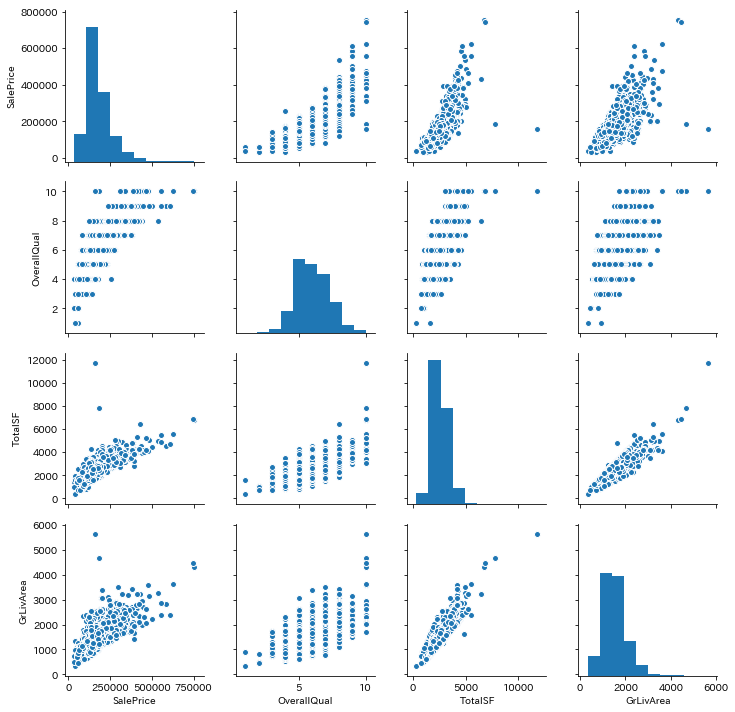

In [0]:
sns.pairplot(train[["SalePrice","OverallQual","TotalSF","GrLivArea"]])

In [0]:
# delete outliner
train = train.drop(index=[1298,523])

In [0]:
y_train = train["SalePrice"]
train = train.drop("SalePrice", axis=1)

X_test = test.drop("SalePrice", axis=1)

X_train.shape, Y_train.shape, X_test.shape

((1458, 250), (1458,), (1459, 222))

In [0]:
# XGBoost
import xgboost as xgb
# GridSearch
from sklearn.grid_search import GridSearchCV

params = {"n_estimators":[600],
            'min_child_weight':[0],
            'gamma':[0],
            "learning_rate":[0.08],
            "max_depth": [3],
            "subsample":[0.8],
            "colsample_bytree": [0.8],
         }
reg = xgb.XGBRegressor()
gs = GridSearchCV(reg, params, cv = 10, n_jobs =1)
gs.fit(train,y_train)
print(gs.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.08, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 600, 'subsample': 0.8}


In [0]:
params = {"n_estimators":[600],
            'min_child_weight':[0],
            'gamma':[0],
            "learning_rate":[0.08],
            "max_depth": [3],
            "subsample":[0.8],
            "colsample_bytree": [0.8]}
reg = xgb.XGBRegressor(**gs.best_params_)
reg.fit(train,y_train)

pred = reg.predict(X_test)

In [0]:
submission = pd.DataFrame({
        "Id": test_ID,
        "SalePrice": pred
    })
submission.to_csv("./data/output/submission.csv", index=False)